In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sdeSimulation(steps, x0, sigma,theta):
    xList, tList = [], []
    nList = []
    t = 0
    h = 1/steps
    X = x0

    for _ in range(int(steps)): 

        eps = np.random.normal(0, 1)
        X = X - h*theta*X + sigma*eps*(h)**0.5
        xList.append(X)
        t += h
        tList.append(t)
        nList.append(sigma*eps*(h)**0.5)

    return xList, tList, nList

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 5.5$ and $\\sigma = 0$')

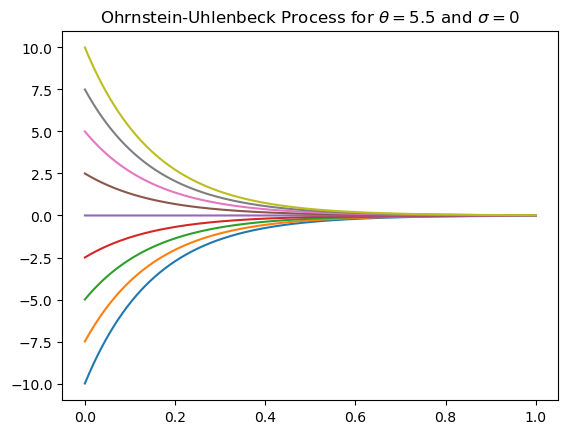

In [6]:
results = sdeSimulation(1e4, 1, 0, 3.5) # steps, x0, sigma, theta
initialConditions = np.arange(-10, 12.5, 2.5)
sigmaList = np.arange(-10, 12.5, 2.5)
plotList = []

for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 0, 3.5)[1], sdeSimulation(1e4, i, 0, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 5.5$ and $\sigma = 0$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ and $\\sigma = 0.5$')

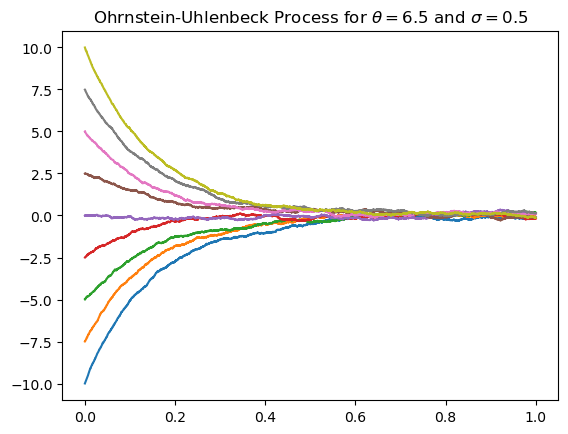

In [7]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 0.5, 3.5)[1], sdeSimulation(1e4, i, 0.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ and $\sigma = 0.5$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ $\\sigma = 5.5$')

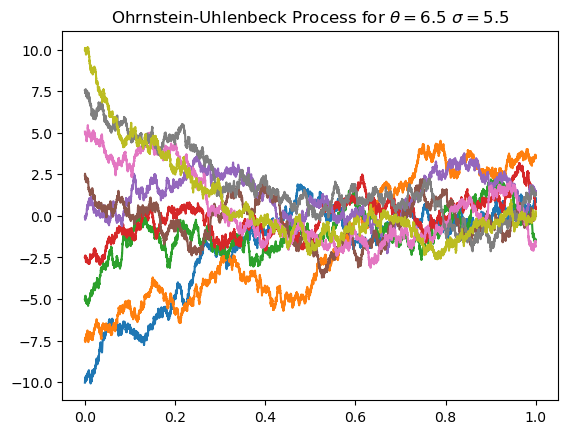

In [8]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 5.5, 3.5)[1], sdeSimulation(1e4, i, 5.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ $\sigma = 5.5$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ $\\sigma = 10.5$')

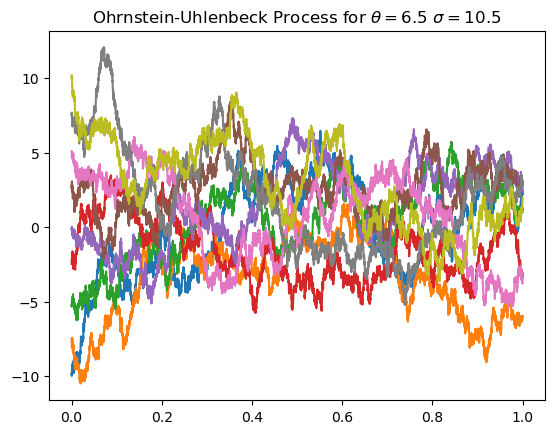

In [9]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 10.5, 3.5)[1], sdeSimulation(1e4, i, 10.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ $\sigma = 10.5$")

In [10]:
def blackScholesSDE(steps, x0, sigma, r, T=1.0):
    xList = [x0]  
    tList = [0.0]  
    h = T / steps  
    
    X = x0
    t = 0.0
    
    for _ in range(steps):
        dW = np.random.normal(0, np.sqrt(h)) # epsilon = sqrt(...)blabla
        X = X + r * X * h + sigma * X * dW + 1/2*sigma**2 * X * (dW**2 - h)
        
        t += h
        xList.append(X)
        tList.append(t)
    
    return xList, tList

In [52]:
def blackScholes(steps, x0, sigma, r, t = 1):
    outList = [] 
    xList = []
    errorList = []
    h = t/steps
    #delta_t = t[1] - t[0] if len(t) > 1 else t[0]
    t = 0
    tList = []
    
    x = x0
    X = x0
    for _ in range(steps):
        Bt = np.random.normal(0, 1)
        x = x * np.exp((r - 0.5 * sigma**2) * h + sigma * np.sqrt(h) * Bt)

        dW = Bt*np.sqrt(h) # epsilon = sqrt(...)blabla
        X = X + r * X * h + sigma * X * dW + 1/2*sigma**2 * X * (dW**2 - h)

        t += h
        outList.append(x)
        xList.append(X)
        errorList.append((X - x)**2)
        tList.append(t)
    
    return outList, tList, xList, errorList

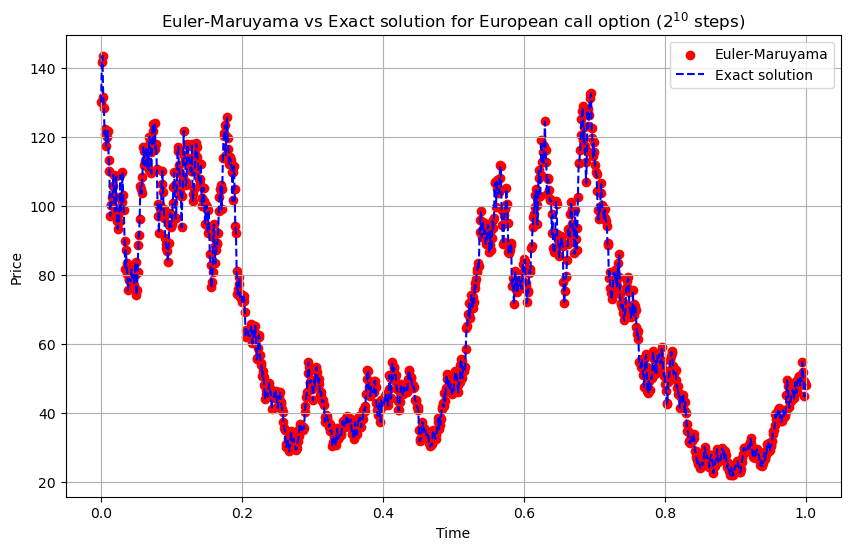

In [83]:
initialConditions = [2**10, 130, 1.6, 0.6]
results = blackScholes(*initialConditions)

plt.figure(figsize=(10, 6))
plt.title("Euler-Maruyama vs Exact solution for European call option ($2^{10}$ steps)")
plt.scatter(results[1], results[2], color = 'red', label = "Euler-Maruyama")
plt.plot(results[1], results[0], color = "blue", label = "Exact solution", ls="--")
plt.xlabel("Time")
plt.grid(True)
plt.ylabel("Price")
plt.legend()

In [57]:
sum(results[-1])/len(results[-1])

np.float64(0.000858376788486565)

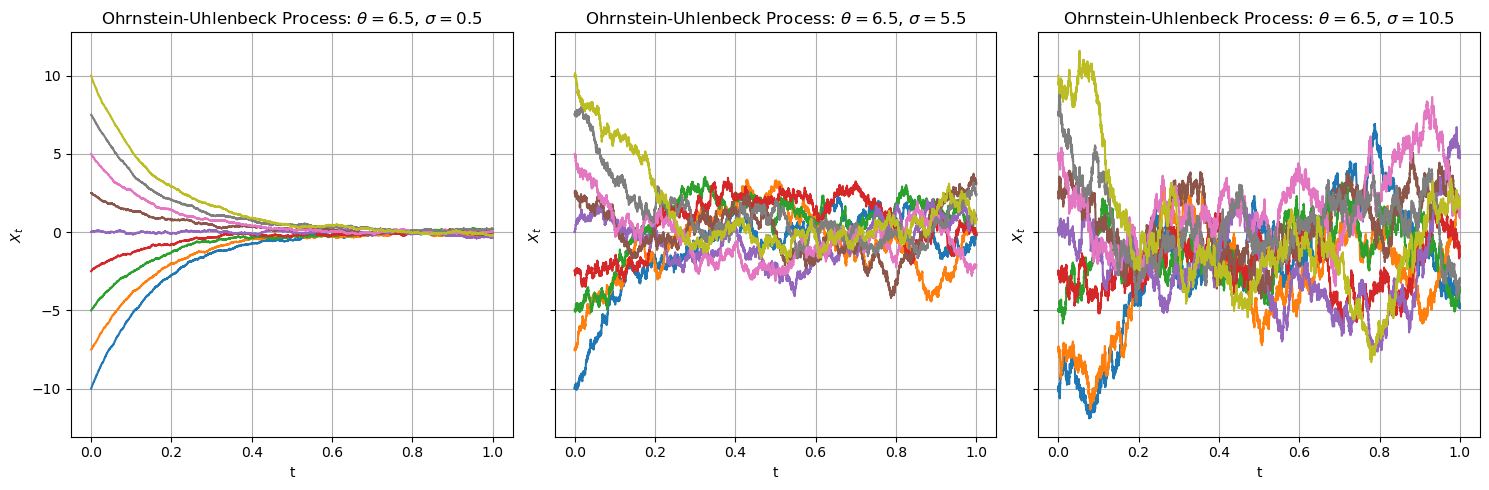

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simular o Processo Ornstein-Uhlenbeck
def sdeSimulation(steps, x0, sigma, theta, T=1.0):
    t = np.linspace(0, T, steps)
    x = np.zeros(steps)
    x[0] = x0
    h = T / steps
    
    for i in range(1, steps):
        dW = np.random.normal(0, np.sqrt(h))  # Incremento Browniano
        x[i] = x[i-1] + theta * (0.0 - x[i-1]) * h + sigma * dW  # OU process
    
    return x, t

# Condições iniciais
initialConditions = np.arange(-10, 12.5, 2.5) # Exemplo de múltiplas condições iniciais

# Parâmetros fixos e variáveis
theta = 6.5  # Velocidade de reversão fixa
sigma_values = [0.5, 5.5, 10.5]  # Diferentes valores de volatilidade

# Criar figura com subplots
fig, axes = plt.subplots(nrows=1, ncols=len(sigma_values), figsize=(15, 5), sharey=True)

# Simular e plotar para cada sigma
for idx, sigma in enumerate(sigma_values):
    ax = axes[idx]
    for x0 in initialConditions:
        x, t = sdeSimulation(10000, x0, sigma, theta)
        ax.plot(t, x, label=f'$x_0 = {x0}$')
    
    ax.set_title(fr"Ohrnstein-Uhlenbeck Process: $\theta = {theta}$, $\sigma = {sigma}$")
    ax.set_xlabel("t")
    ax.set_ylabel("$X_t$")
    ax.grid(True)

plt.tight_layout()
plt.show()